In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# swapna 

In [2]:
df=pd.read_csv("C:\\Users\\ankom\\Downloads\\dc-wikia-data.csv")

In [3]:
df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


#this data frame having 6896 rows and 13 columns

In [4]:
df.shape

(6896, 13)

In [5]:
df["ALIGN"].nunique()

4

In [6]:
df.isna().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#it is has no duplicate rows and has many null values and filling those null values using mode and mean 

In [9]:
df["ID"].mode()

0    Public Identity
Name: ID, dtype: object

In [10]:
df["ID"].fillna("Public Identity",inplace=True)

In [11]:
df["ID"].isna().sum()

0

In [12]:
df=df.drop(["GSM","EYE","HAIR"],axis=1)

In [13]:
df.shape

(6896, 10)

In [14]:
df.isna().sum()

page_id               0
name                  0
urlslug               0
ID                    0
ALIGN               601
SEX                 125
ALIVE                 3
APPEARANCES         355
FIRST APPEARANCE     69
YEAR                 69
dtype: int64

In [15]:
df["ALIGN"].mode()

0    Bad Characters
Name: ALIGN, dtype: object

In [16]:
df["ALIGN"].fillna("Bad Characters",inplace=True)

In [17]:
df["SEX"].mode()

0    Male Characters
Name: SEX, dtype: object

In [18]:
df["SEX"].fillna("Male Characters",inplace=True)

In [19]:
df["FIRST APPEARANCE"].fillna(method="ffill",inplace=True)
df["FIRST APPEARANCE"].isna().sum()

C:\Users\ankom\AppData\Local\Temp\ipykernel_24852\547084166.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["FIRST APPEARANCE"].fillna(method="ffill",inplace=True)


0

In [20]:
df["YEAR"].fillna(method="ffill",inplace=True)
df["YEAR"].isna().sum()

C:\Users\ankom\AppData\Local\Temp\ipykernel_24852\1328490968.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["YEAR"].fillna(method="ffill",inplace=True)


0

In [21]:
df.isna().sum()

page_id               0
name                  0
urlslug               0
ID                    0
ALIGN                 0
SEX                   0
ALIVE                 3
APPEARANCES         355
FIRST APPEARANCE      0
YEAR                  0
dtype: int64

In [22]:
df["ALIVE"].mode()

0    Living Characters
Name: ALIVE, dtype: object

In [23]:
df["ALIVE"].fillna("Living Characters",inplace=True)

In [24]:
df["APPEARANCES"].mean()

23.62513377159456

In [25]:
df["APPEARANCES"].fillna("23.6251",inplace=True)

C:\Users\ankom\AppData\Local\Temp\ipykernel_24852\120195825.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23.6251' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["APPEARANCES"].fillna("23.6251",inplace=True)


In [26]:
df.isna().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
dtype: int64

In [27]:
#seperating numerical and categorical columns

In [28]:
df_num=df.select_dtypes(include="number")
df_num

,page_id,YEAR
0,1422,1939.0
1,23387,1986.0
2,1458,1959.0
3,1659,1987.0
4,1576,1940.0
...,...,...
6891,66302,1936.0
6892,283475,1936.0
6893,283478,1936.0
6894,283471,1936.0


In [29]:
df_char=df.select_dtypes(include="object")
df_char.shape

(6896, 8)

In [30]:
#outliers

In [31]:
for i, j in df_num.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    j_col=j[(j>=lower_bound)&(j<=upper_bound)]
    df=df[df[i].isin(j_col)]

In [32]:
df.shape

(6491, 10)

In [33]:
#visualization

<Axes: xlabel='ALIGN', ylabel='count'>

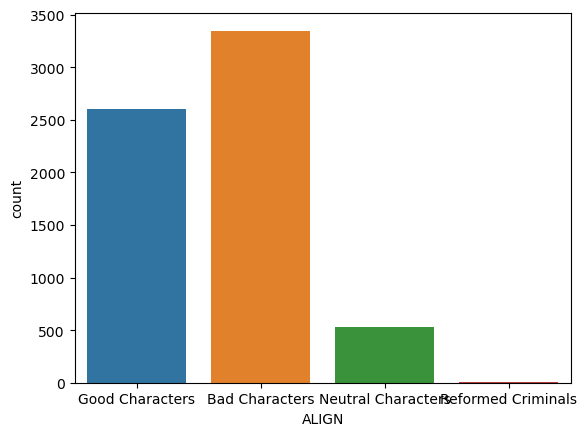

In [34]:
sns.countplot(data=df,x="ALIGN")

C:\Users\ankom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ankom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SEX', ylabel='ID'>

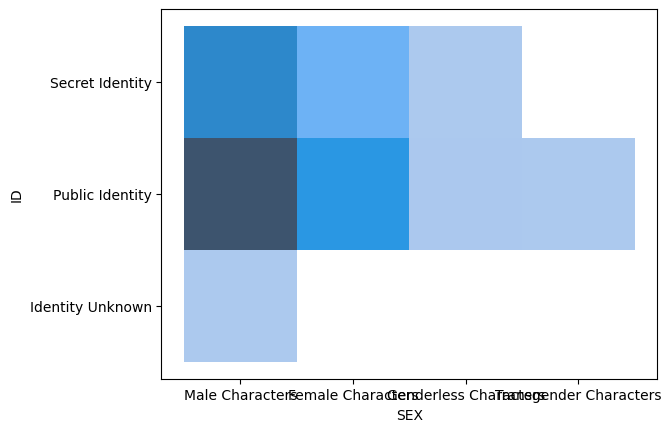

In [35]:
sns.histplot(data=df,x="SEX",y="ID")

In [65]:
#scaling and encoding

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num=df.select_dtypes(include=["number"]).columns
df[df_num]=scaler.fit_transform(df[df_num])

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_char=df.select_dtypes(include=["object"]).columns
for col in df_char:
    df[col]=df[col].astype(str)
    df[col]=le.fit_transform(df[col])

In [38]:
df

,page_id,name,urlslug,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
1,-1.179159,5665,5664,2,1,2,1,108,340,-0.467349
2,-1.382585,2364,2364,2,1,2,1,54,41,-2.501274
3,-1.380721,2842,2843,1,1,2,1,35,346,-0.392018
7,-1.382650,5930,5929,2,1,2,1,13,371,-0.241357
8,-0.730424,1616,1616,1,1,0,1,10,146,-1.747969
...,...,...,...,...,...,...,...,...,...,...
6873,-1.382669,1701,1701,1,1,0,1,101,98,-2.049291
6874,-0.207800,559,559,1,0,2,1,101,82,-2.199952
6875,-1.189011,2851,2851,1,0,2,1,101,70,-2.275283
6876,-1.383281,2083,2083,2,1,2,1,101,46,-2.425944


In [39]:
x=df.drop(["ALIGN"],axis=1)
y=df["ALIGN"]

In [40]:
y

1       1
2       1
3       1
7       1
8       1
       ..
6873    1
6874    0
6875    0
6876    1
6877    1
Name: ALIGN, Length: 6491, dtype: int32

In [66]:
#diving the df into test and train data 

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [42]:
x_train

,page_id,name,urlslug,ID,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
3509,-1.178371,4646,4645,1,2,1,175,602,1.114593
1362,-0.952616,2744,2744,2,2,1,80,361,-0.316688
2635,-1.161116,3909,3909,1,2,1,218,585,1.039263
2334,-0.061370,2164,2164,1,2,1,1,374,-0.241357
3289,1.797794,840,840,1,2,1,193,430,0.059965
...,...,...,...,...,...,...,...,...,...
3347,0.273691,5129,5128,2,0,1,193,368,-0.316688
6696,1.485350,5545,5544,2,2,0,101,470,0.285957
6518,-0.213904,4583,4582,1,2,1,0,48,-2.425944
6750,-0.473175,1999,1999,1,2,1,101,398,-0.090696


In [67]:
#modeling 

In [68]:
#LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR

LogisticRegression()

In [44]:
LR.fit(x_train,y_train)

C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
from sklearn.metrics import recall_score,precision_score

In [46]:
y_pred=LR.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
LR.score(x_train,y_train)

0.5217642526964561

In [48]:
LR.score(x_test,y_test)

0.5150115473441108

In [49]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.46891626483785137

In [50]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.5150115473441108

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=rf.predict(x_test)

In [53]:
rf.score(x_train,y_train)

1.0

In [54]:
rf.score(x_test,y_test)

0.6304849884526559

In [55]:
recall=recall_score(y_test,y_pred,average="weighted")
recall

0.6304849884526559

In [56]:
precision=precision_score(y_test,y_pred,average="weighted")
precision

0.6306833563542055

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dt.predict(x_test)

In [59]:
dt.score(x_train,y_train)

1.0

In [60]:
dt.score(x_test,y_test)

0.5842956120092379

In [61]:
recall=recall_score(y_test,y_pred,average="weighted")
recall

C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5842956120092379

In [62]:
precision=precision_score(y_test,y_pred,average="weighted")
precision

0.5918701402818847

In [63]:
!pip install XGBoost

In [64]:
import XGBoost as xgb
from xgb import XGBoostClassifier

ModuleNotFoundError: No module named 'XGBoost'